# 1. Defining the problem

This dataset contains the data of few people medical history, with their medical conditions, indicating their age, height, weight and also if they have gone through any surgery previously, 

Based on all this conditions a person pays different amount of Medical Insurance Premium, which is also present in the dataset.

From this data, we have to analyze, what factors and what medical conditions is affecting or causing the varying the premium amount. Also by further exploring, we are alanyzing the models to predict what amount someone have to pay if having medical condition based on dataset criteria. 

# 2. Importing Libraries

In [1579]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

# 3. Performing Exploratory Aata Analysis 

                                            3.1 IMPORTING THE DATASET

First of all changing the directory to import the dataset from its location and then assigning it a nameas MIP.

In [1580]:
os.chdir("E:\\MIP_pro")

In [1581]:
MIP=pd.read_csv("Medicalpremium.csv")

                                             3.2 EXPLORING DATASET

In [1582]:
MIP.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


                                              3.3 DATA CLEANING

In [1583]:
MIP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [1584]:
MIP.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

* We can see that all the columns are of integer format and there is no null values in any column.

                      // Now analyzing the (Age, Weight, Height and Premium Price) to see if they are 
                              containing any kind of outlier or unexpected numeric values//

In [1585]:
Unique_Age = MIP['Age'].unique()
print('Age_range', sorted(Unique_Age))
print('\n')

Unique_Height = MIP['Height'].unique()
print('Height_range', sorted(Unique_Height))
print('\n')

Unique_Weight = MIP['Weight'].unique()
print('Weight_range', sorted(Unique_Weight))
print('\n')

Unique_PremiumPrice = MIP['PremiumPrice'].unique()
print('PremiumPrice_range', sorted(Unique_PremiumPrice))


Age_range [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


Height_range [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


Weight_range [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 114, 116, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 132]


PremiumPrice_range [15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 34000, 35000, 36000, 38000, 39000, 40000]


* The Age of the people ranges from 18 years to 66 years which is a correct range.

* The Height of the people ranges from 145cm to 188cm which is a correct range.

* The Weight of the people ranges from 51kg to 132kg which is a correct range.

* The Premium Price ranges from Rs.15000 to Rs.40000 which is a corret premium range yearly (maybe not in Rupees, but in other   currency). 

                                        3.4 EXAMINE AND SUMMARY OF DATA

In [1586]:
MIP.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


# 4. Visualization of Data

                      4.1 Visualization the distribution of several features by using of Histogram plot 

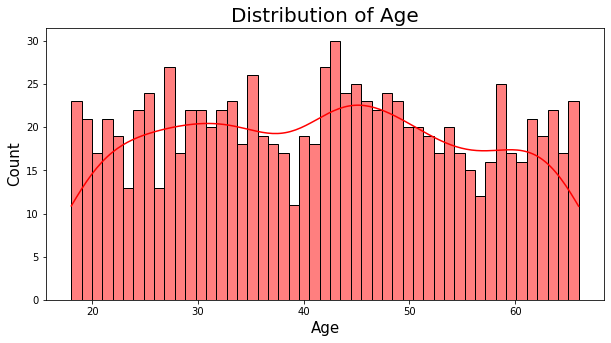

In [1587]:
plt.figure(figsize=(10,5))
sns.histplot(data=MIP,x="Age",bins=49,kde=True,color='red')
plt.xlabel("Age",size=15)
plt.ylabel("Count",size=15);
plt.title("Distribution of Age",size=20);

Text(0.5, 1.0, 'Distribution of PremiumPrice')

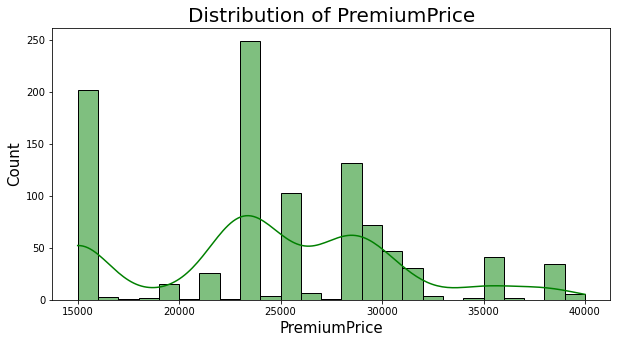

In [1588]:
plt.figure(figsize=(10,5))
sns.histplot(data=MIP,x="PremiumPrice",bins=25,kde=True,color="green")
plt.xlabel("PremiumPrice",size=15)
plt.ylabel("Count",size=15)
plt.title("Distribution of PremiumPrice",size=20)

Text(0.5, 1.0, 'Distribution of Weight')

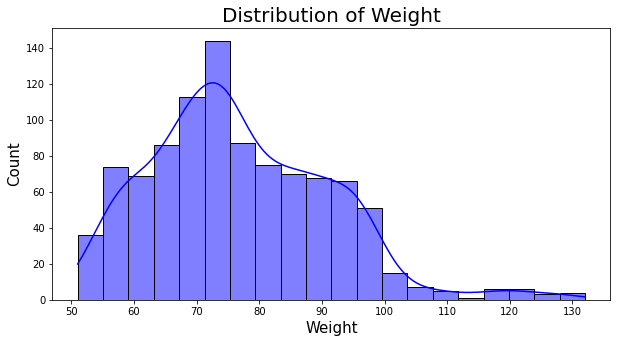

In [1589]:
plt.figure(figsize=(10,5))
sns.histplot(data=MIP,x="Weight",bins=20,kde=True,color="blue")
plt.xlabel("Weight",size=15)
plt.ylabel("Count",size=15)
plt.title("Distribution of Weight",size=20)


 * From above bar plot we see that weight category is left skeweed, with mean weight about 77

Text(0.5, 1.0, 'Distribution of Height')

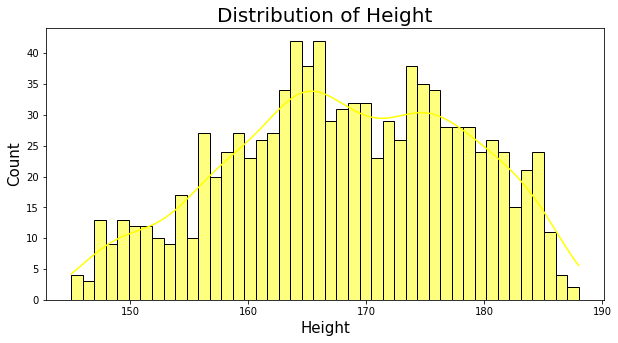

In [1590]:
plt.figure(figsize=(10,5))
sns.histplot(data=MIP,x="Height",bins=44,kde=True,color="yellow")
plt.xlabel("Height",size=15)
plt.ylabel("Count",size=15)
plt.title("Distribution of Height",size=20)


* From above bar plot we see that height category is right skeweed, with mean height about 168 cm.

              //Now checking through count to see the presence or absence of medical condition in peoples 
               (where 1 represent presence and 0 represent the absence of that particular medical condition)// 

[Text(0.5, 1.0, 'Number Of Patients with HistoryOfCancerInFamily')]

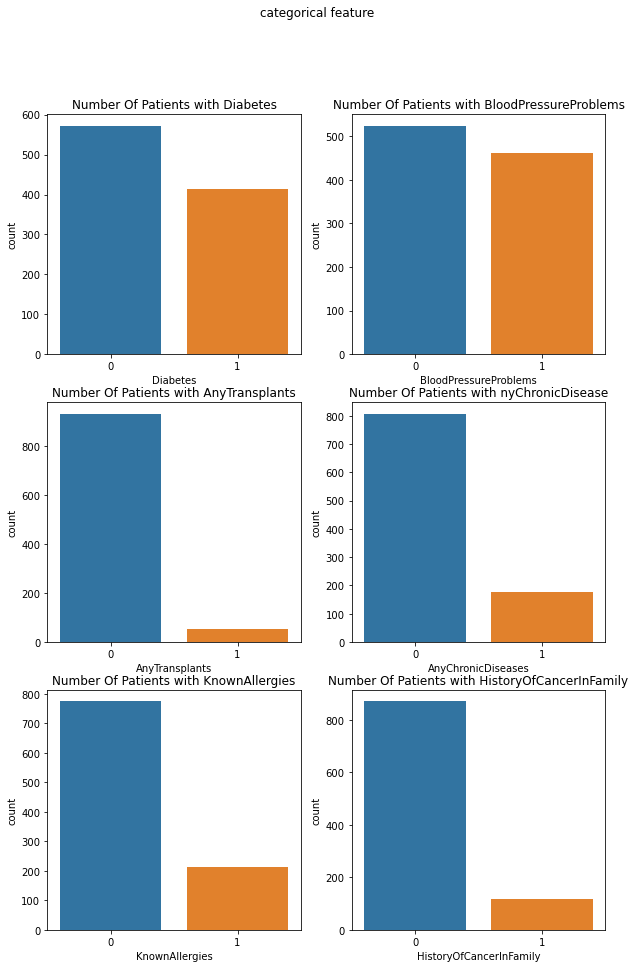

In [1591]:
fig, axes = plt.subplots(3,2 , figsize=(10, 15))
fig.suptitle('categorical feature')

sns.countplot(x='Diabetes', data=MIP, ax=axes[0,0]).set(title='Number Of Patients with Diabetes')
sns.countplot(x='BloodPressureProblems', data=MIP, ax=axes[0,1]).set(title='Number Of Patients with BloodPressureProblems')
sns.countplot(x='AnyTransplants', data=MIP, ax=axes[1,0]).set(title='Number Of Patients with AnyTransplants')
sns.countplot(x='AnyChronicDiseases', data=MIP, ax=axes[1,1]).set(title='Number Of Patients with nyChronicDisease')
sns.countplot(x='KnownAllergies', data=MIP, ax=axes[2,0]).set(title='Number Of Patients with KnownAllergies')
sns.countplot(x='HistoryOfCancerInFamily', data=MIP, ax=axes[2,1]).set(title='Number Of Patients with HistoryOfCancerInFamily')


                           4.2 Visualizing for number of patient and there number of surgeries

[Text(0.5, 1.0, 'Patients with Number of major surgeries')]

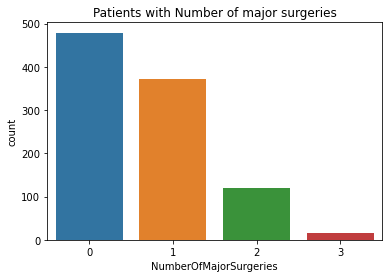

In [1592]:
sns.countplot(x='NumberOfMajorSurgeries', data=MIP).set(title='Patients with Number of major surgeries')

[Text(0.5, 1.0, 'Number Of Major Surgeries Vs Premium Price')]

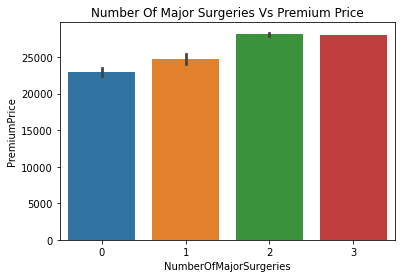

In [1593]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='NumberOfMajorSurgeries',y='PremiumPrice',data = MIP).set(title='Number Of Major Surgeries Vs Premium Price')

* Here we cannot see any major relations or changes between Number Of Major Surgeries and Premium Price. But we can conclude     that peole undergoing more surgeries pays a little higher premium.

[Text(0.5, 1.0, 'Number Of Major Surgeries Vs Age')]

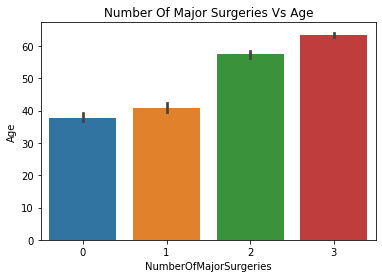

In [1594]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='NumberOfMajorSurgeries',y='Age',data = MIP).set(title='Number Of Major Surgeries Vs Age')

* From this plot its clear that people whose age are more than 50 years undergoes 2 or more surgeries.
 Thus we can conclude that people whose age is more than 50 years and who have undergone more than 2 surgeries has to pay high   premium.

[Text(0.5, 1.0, 'Transplants Vs Premium Price')]

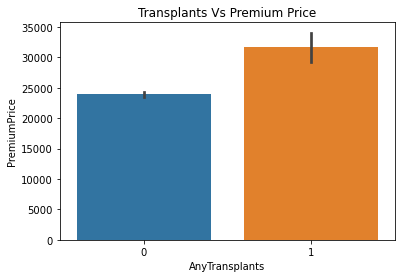

In [1595]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='AnyTransplants',y='PremiumPrice',data = MIP).set(title='Transplants Vs Premium Price')

* We can see that People who have done a transplantation pays higher premium than those who have not done any transplantation

[Text(0.5, 1.0, 'Diabetes Vs PremiumPrice')]

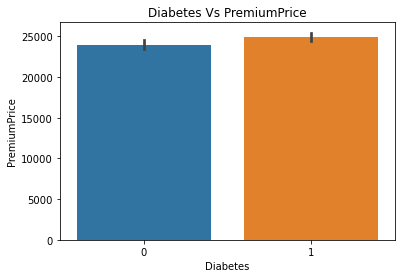

In [1596]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='Diabetes',y='PremiumPrice',data = MIP).set(title='Diabetes Vs PremiumPrice')

* People having Diabetes pays a little higher Premium.

[Text(0.5, 1.0, 'Diabetes Vs Age')]

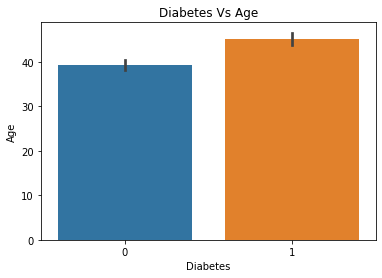

In [1597]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='Diabetes',y='Age',data = MIP).set(title='Diabetes Vs Age')

* Most of the people having diabetes are more tan 40 years of age.

[Text(0.5, 1.0, 'Blood Pressure Vs PremiumPrice')]

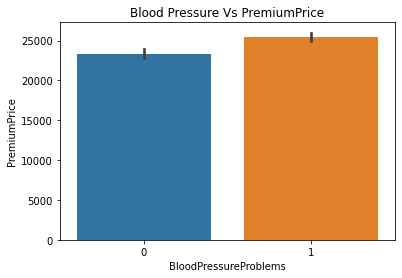

In [1598]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='BloodPressureProblems',y='PremiumPrice',data = MIP).set(title='Blood Pressure Vs PremiumPrice')

* There is not much reation between Blood pressure and Premium Paid. But people having Blood Pressure pays a little higher Premium.

[Text(0.5, 1.0, 'Blood Pressure Vs Age')]

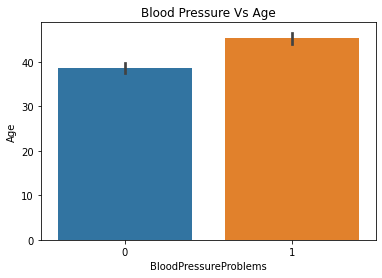

In [1599]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='BloodPressureProblems',y='Age',data = MIP).set(title='Blood Pressure Vs Age')

* Most of the people having Blood Pressure are also more than 40 years of age.

[Text(0.5, 1.0, 'Chronic disease Vs Premium Paid')]

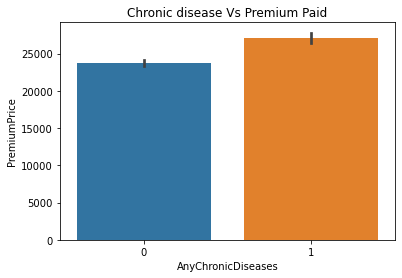

In [1600]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='AnyChronicDiseases',y='PremiumPrice',data = MIP).set(title='Chronic disease Vs Premium Paid')

* Most of the people having Chronic disease pays a higher premium

[Text(0.5, 1.0, 'HistoryOfCancerInFamily Vs Premium Paid')]

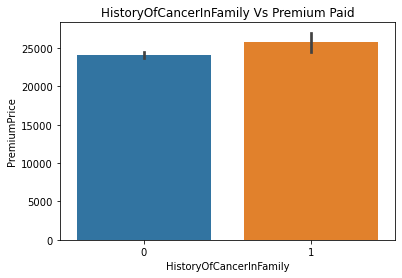

In [1601]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='HistoryOfCancerInFamily',y='PremiumPrice',data = MIP).set(title='HistoryOfCancerInFamily Vs Premium Paid')

* Cancer in family history doesnot affect the Premium Price much.

[Text(0.5, 1.0, 'HistoryOfCancerInFamily Vs NumberOfMajorSurgeries')]

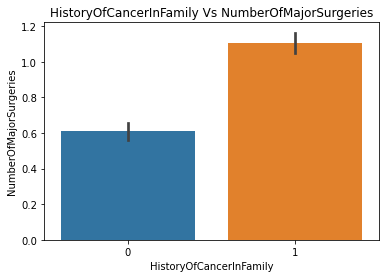

In [1602]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='HistoryOfCancerInFamily',y='NumberOfMajorSurgeries',
            data = MIP).set(title='HistoryOfCancerInFamily Vs NumberOfMajorSurgeries')

* People who have Cancer in family history are more likely to undergoing Major Surgery. Thus people having cancer in family history may have high chances of health related problems that will lead to surgery

                     4.3 Ploting a Scatter plot to see any kind of relation between weight and height.

Text(0.5, 1.0, 'Scatter Plot')

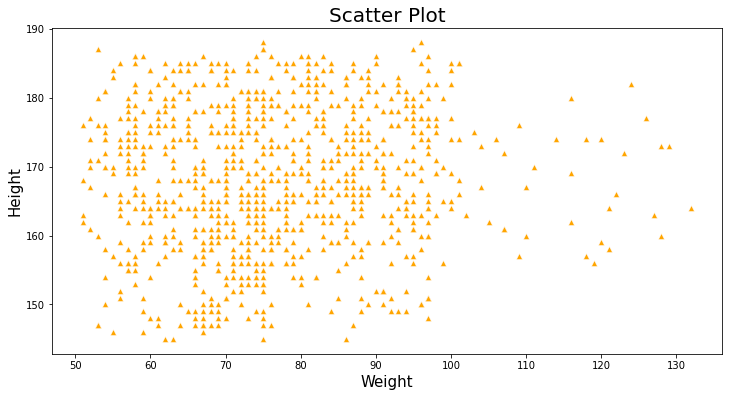

In [1603]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=MIP,x="Weight",y="Height",color="orange",marker="^")
plt.xlabel("Weight",size=15)
plt.ylabel("Height",size=15)
plt.title("Scatter Plot",size=20)

* From the above plot we cannot deduce any kind of relationship between weight and height. 

                               4.4 Heatmap to find the Corellation between different features

<AxesSubplot:>

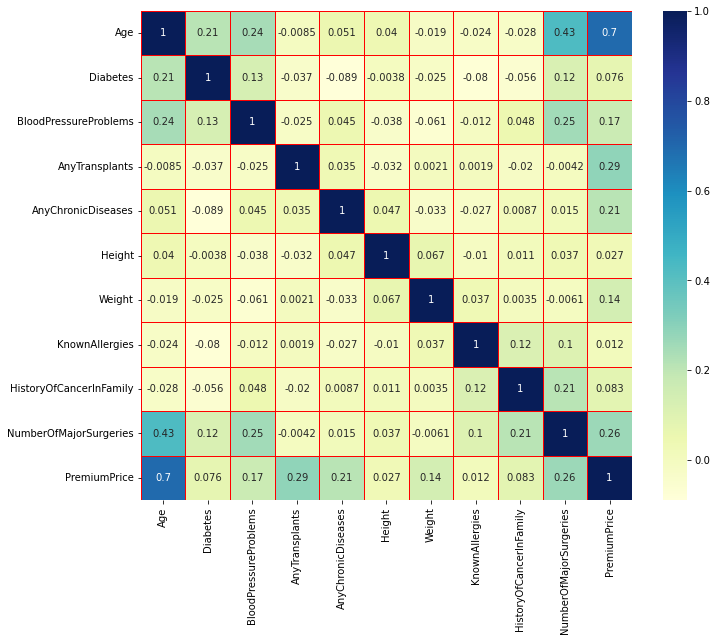

In [1604]:
plt.figure(figsize=(11,9))
sns.heatmap(MIP.corr(), cmap="YlGnBu",annot=True,linewidths=1,linecolor="red")

* From the above heatmap, we see that there is a high corelation between Age of a person and Premium paid by him.

* We can also see good correlation between Number of major Surgeries to Age, and to Blood Pressure problems.

* Also there are good correlation between Premium price to Any Transplaent, Number of Major Surgeries, Any Chronic Disease.

                                    // Deducing the Predictor's/Features //

In [1605]:
X=MIP.drop(["PremiumPrice"],axis=1)
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1


                                    // Deducing the Target Variable //

In [1606]:
Y=MIP["PremiumPrice"]
Y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [1607]:
X.var()

Age                        194.975741
Diabetes                     0.243828
BloodPressureProblems        0.249264
AnyTransplants               0.052723
AnyChronicDiseases           0.148087
Height                     101.972731
Weight                     203.492959
KnownAllergies               0.168952
HistoryOfCancerInFamily      0.103912
NumberOfMajorSurgeries       0.561308
dtype: float64

* The one with less variance will alter our model list , as the are moreover the same through out the data set so can't 
  really ue full to know whats happening in data.


<AxesSubplot:xlabel='Weight'>

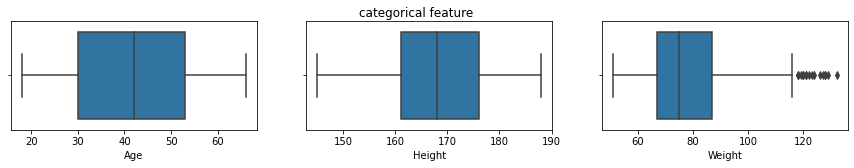

In [1608]:
fig, axes = plt.subplots(1,3 , figsize=(15, 2))
fig.suptitle('categorical feature')
sns.boxplot(x='Age', data=MIP, ax=axes[0])
sns.boxplot(x='Height', data=MIP, ax=axes[1])
sns.boxplot(x='Weight', data=MIP, ax=axes[2])


                   4.5 Visualizing the trend for Age, Weight and Height with respect to PremiumPrice

<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

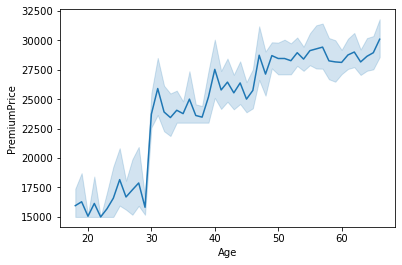

In [1609]:
sns.lineplot(x=MIP.Age,y=MIP.PremiumPrice)

* From this lineplot we can see that except few points, Most of the points are alligned in a particular price forcertain range of Age.
* Most of the people between 18 to 30 years pays a premium of 15000-18000. Few people between age 25 to 50 years pays a premium of around 22000-28000. And so on for different Age range.
* To understand this more clearly we will add a new column whose value will be based on the age group. We will group age as low, medium and high.

<AxesSubplot:xlabel='Height', ylabel='PremiumPrice'>

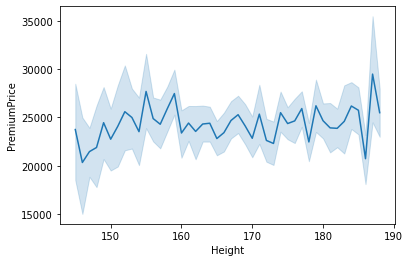

In [1610]:
sns.lineplot(x=MIP.Height,y=MIP.PremiumPrice)

* It's quite clear from the lineplot that there is no specific pattern which neither indicates positive nor negative
  relationship between height and PremiumPrice.

<AxesSubplot:xlabel='Weight', ylabel='PremiumPrice'>

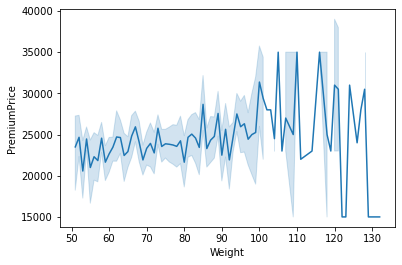

In [1611]:
sns.lineplot(x=MIP.Weight,y=MIP.PremiumPrice)

* It's quite clear from the lineplot that there is no specific pattern which neither indicates positive nor negative
  relationship between weight and PremiumPrice.

                     4.6 Visualizing the realation between several medical conditions and Premium Prices.

In [1612]:
X_x= ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

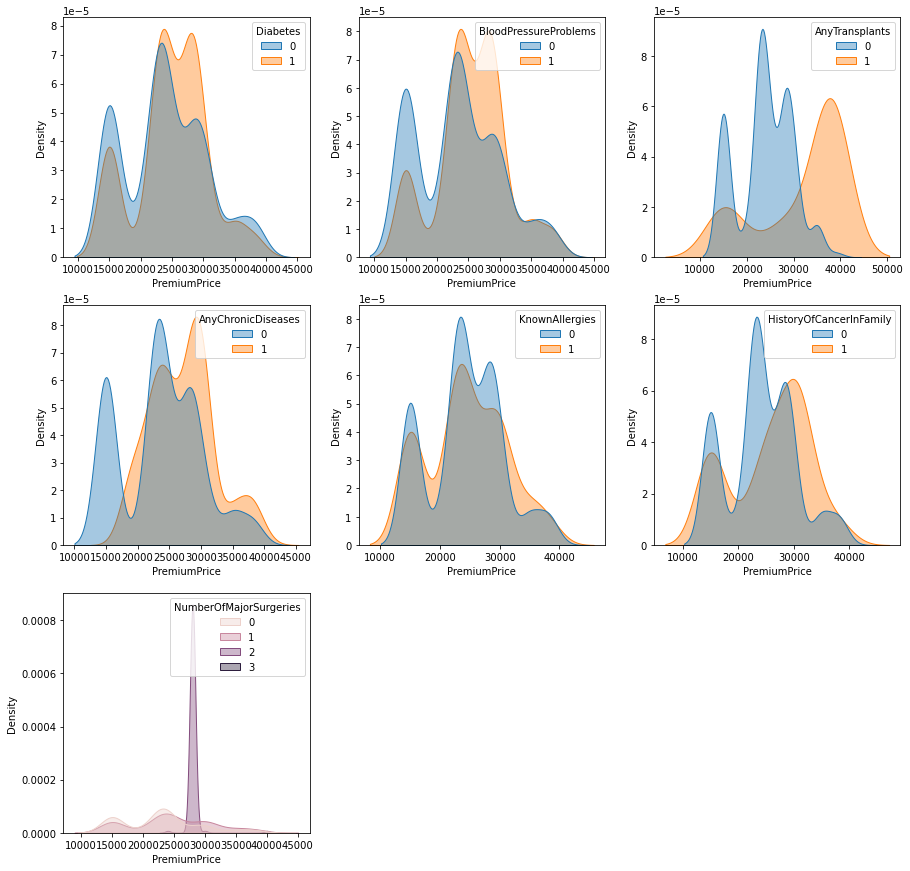

In [1613]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in X_x:
    plt.subplot(a,b,c)
    sns.kdeplot(x='PremiumPrice', data=MIP, hue=feature, fill=True, common_norm=False, 
                alpha =0.4, warn_singular=False)
    c=c+1
    
plt.show()

* we can clearly see that variables like "AnyTransplants" ,"AnyChronicDiseases" ,"HistoryOfCancerInFamily" 
  and "NumberOfMajorSurgeries" has an significantimpact on premium price, other variables doesn't seem to have any 
  significant impact on the premium though.


# 5. Creating new variable

Can barely see any positive or negative relationship for height and weight with premium price too.So creating new variable named BMI using these variables might show an impact on the premium price.
It's quite hard to come up with a conclusion using only the BMI value. therefore, assigning people to one of the below
categories according to their BMI value and analyzing them might give us a good insight.

In [1614]:
MIP['BMI'] = MIP.Weight.values/(((MIP.Height).values/100)**2)
MIP.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [1615]:
MIP.max()

Age                           66.0
Diabetes                       1.0
BloodPressureProblems          1.0
AnyTransplants                 1.0
AnyChronicDiseases             1.0
Height                       188.0
Weight                       132.0
KnownAllergies                 1.0
HistoryOfCancerInFamily        1.0
NumberOfMajorSurgeries         3.0
PremiumPrice               40000.0
BMI                           50.0
dtype: float64

  Categoriesing BMI in different levels for better understanding, classifying them as-
  * BMI=weight(kg)/(height(m))^2

* BMI less than 18.5, falls within the underweight range.

* BMI 18.5 to <25, falls within the normal weight range.

* BMI 25.0 to <30, falls within the overweight range.

* BMI 30.0 to <50, falls within the obesity range and

* BMI >50 within the Extreme obesity.


In [1616]:
under_index = MIP[MIP.BMI<18.4999].index
normal_index = MIP[(MIP.BMI>=18.5) & (MIP.BMI<24.9999)].index
over_index = MIP[(MIP.BMI>=25) & (MIP.BMI<29.9999)].index
obesity_index = MIP[(MIP.BMI>=30) & (MIP.BMI<49.9999)].index
Extreme_obesity_index = MIP[MIP.BMI>=50].index

MIP.loc[under_index,'BMI_Status'] = 'Under Weight'
MIP.loc[normal_index,'BMI_Status'] = 'Normal'
MIP.loc[over_index,'BMI_Status'] = 'Over Weight'
MIP.loc[obesity_index,'BMI_Status'] = 'Obesity'
MIP.loc[Extreme_obesity_index,'BMI_Status'] = 'Extreme Obesity'

In [1617]:
MIP.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Over Weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obesity


                           5.1 Checking for effect different BMI's on Premium Price via plot.

Text(0.5, 1.0, 'PremiumPrice based on BMI Status')

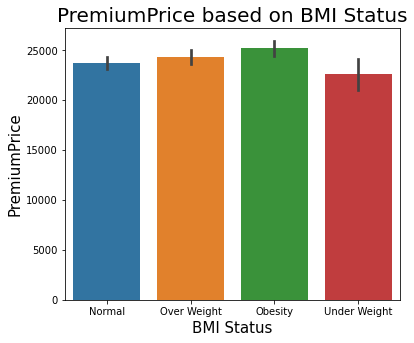

In [1618]:
plt.figure(figsize=(6,5))
sns.barplot(x=MIP.BMI_Status,y=MIP.PremiumPrice)
plt.xlabel("BMI Status",size=15)
plt.ylabel("PremiumPrice",size=15)
plt.title("PremiumPrice based on BMI Status",size=20)


* Can't say anything solidly that any BMI status shows any effect on Premium Price. So checking through correlation.

In [1619]:
np.corrcoef(MIP.BMI,MIP.PremiumPrice)

array([[1.        , 0.10381175],
       [0.10381175, 1.        ]])

In [1620]:
np.corrcoef(MIP.Weight,MIP.PremiumPrice)

array([[1.        , 0.14150741],
       [0.14150741, 1.        ]])

In [1621]:
np.corrcoef(MIP.Height,MIP.PremiumPrice)

array([[1.        , 0.02690951],
       [0.02690951, 1.        ]])

* Can't see anykind kind of increase in correlation by assigning new variable BMI

# 6. Assigning Lables to Age, Weight, Height, and Premium price

                                6.1 Creating bins to visualize data in better way

In [1622]:
pr_lab=['Less','Medium','High']
MIP['PremiumLable']=pr_bins=pd.cut(MIP["PremiumPrice"],bins=3,labels=pr_lab,precision=0)
MIP['AgeLable']=pr_bins=pd.cut(MIP["Age"],bins=3,labels=pr_lab,precision=0)
MIP['WeightLable']=pr_bins=pd.cut(MIP["Weight"],bins=3,labels=pr_lab,precision=0)
MIP['HeightLable']=pr_bins=pd.cut(MIP["Height"],bins=3,labels=pr_lab,precision=0)

In [1623]:
MIP.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'BMI_Status', 'PremiumLable', 'AgeLable', 'WeightLable',
       'HeightLable'],
      dtype='object')

In [1624]:
MIP.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status,PremiumLable,AgeLable,WeightLable,HeightLable
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal,Medium,Medium,Less,Less
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal,Medium,High,Less,High
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal,Less,Medium,Less,Less
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Over Weight,Medium,High,Medium,High
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obesity,Less,Medium,Medium,Medium


                                6.2. Converting new categorical columns to numeric ones

In [1625]:
MIP=pd.get_dummies(data=MIP,columns=['PremiumLable','AgeLable','WeightLable','HeightLable'])

In [1626]:
MIP.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,PremiumLable_High,AgeLable_Less,AgeLable_Medium,AgeLable_High,WeightLable_Less,WeightLable_Medium,WeightLable_High,HeightLable_Less,HeightLable_Medium,HeightLable_High
0,45,0,0,0,0,155,57,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,60,1,0,0,0,180,73,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,36,1,1,0,0,158,59,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,52,1,1,0,1,183,93,0,0,2,...,0,0,0,1,0,1,0,0,0,1
4,38,0,0,0,1,166,88,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [1627]:
MIP.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'BMI_Status', 'PremiumLable_Less', 'PremiumLable_Medium',
       'PremiumLable_High', 'AgeLable_Less', 'AgeLable_Medium',
       'AgeLable_High', 'WeightLable_Less', 'WeightLable_Medium',
       'WeightLable_High', 'HeightLable_Less', 'HeightLable_Medium',
       'HeightLable_High'],
      dtype='object')

In [1628]:
MIP.shape

(986, 25)

# 7. Selecting Features and Target datasets

In [1629]:
X_Prime=MIP.drop(['Age','Height','Weight','PremiumPrice','BMI','BMI_Status'],axis=1)
X_Prime.columns

Index(['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'PremiumLable_Less', 'PremiumLable_Medium',
       'PremiumLable_High', 'AgeLable_Less', 'AgeLable_Medium',
       'AgeLable_High', 'WeightLable_Less', 'WeightLable_Medium',
       'WeightLable_High', 'HeightLable_Less', 'HeightLable_Medium',
       'HeightLable_High'],
      dtype='object')

In [1630]:
Y_Prime=MIP.PremiumPrice

* Here X_Prime represent the feature's and Y_Prime represent Target variable

# 8. Building ML Model then performing their Visualization and Testing

                                            8.1 LINEAR REGRESSION

In [1631]:
x_train, x_test, y_train, y_test = train_test_split(X_Prime,Y_Prime , test_size=0.15, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
train_accuracy=Lin_reg.score(x_train,y_train)
test_accuracy=Lin_reg.score(x_test,y_test)
print(Lin_reg.score(x_train, y_train))
print(Lin_reg.score(x_test, y_test))


26986.620712818065
[ -226.74748625   362.08734072  1070.23714839  1364.71374633
    39.9165117      7.98089584   156.96630028 -6778.21303174
  -885.5765845   7663.78961624 -2858.1334158   1920.83584142
   937.29757438  -172.86604408   374.5358453   -201.66980122
   111.03825801  -135.96565613    24.92739812]
0.8526497817960066
0.8664396898740601


In [1632]:
x_train, x_test, y_train, y_test = train_test_split(X_Prime,Y_Prime , test_size=0.15, random_state=0)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.8664396898740601


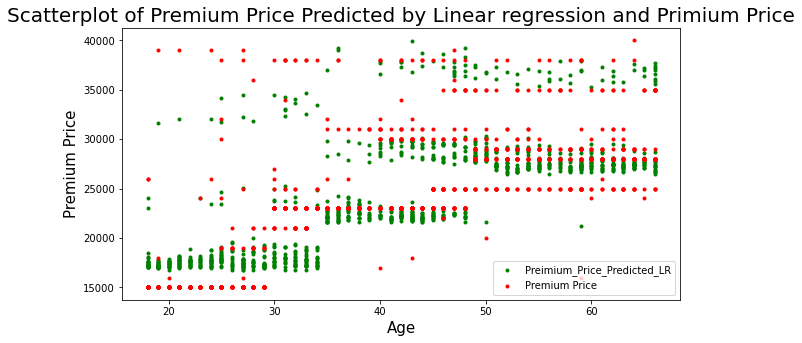

In [1633]:
Preimium_Price_Predicted_LR=Lin_reg.predict(X_Prime)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot()
ax1.scatter(x=MIP.Age,y=Preimium_Price_Predicted_LR,marker=".",color="green")
ax1.scatter(x=MIP.Age,y=Y_Prime,marker=".",color="red")
plt.xlabel("Age",size=15)
plt.ylabel("Premium Price",size=15)
plt.title("Scatterplot of Premium Price Predicted by Linear regression and Primium Price",size=20)
plt.legend(["Preimium_Price_Predicted_LR","Premium Price"],loc="lower right")


In [1634]:
np.corrcoef(Preimium_Price_Predicted_LR,Y_Prime)

array([[1.        , 0.92463262],
       [0.92463262, 1.        ]])

* By Linear regression model the train and test accuracy acheived are 0.8526497817960066 and 0.8664396898740601 respectively,
  and correlation between Premium Price and Premium Price Predicted by Linear regression model is 0.92463262.

                                             8.2 POLYNOMIAL REGRESSION

In [1635]:
pol = PolynomialFeatures (degree = 2)
X_Prime_pol = pol.fit_transform(X_Prime)
x_train, x_test, y_train, y_test = train_test_split(X_Prime_pol,Y_Prime, test_size=0.15, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
train_accuracy=Pol_reg.score(x_train,y_train)
test_accuracy=Pol_reg.score(x_test,y_test)
print(Pol_reg.score(x_train, y_train))
print(Pol_reg.score(x_test, y_test))


0.9035412963885743
0.871783706198217


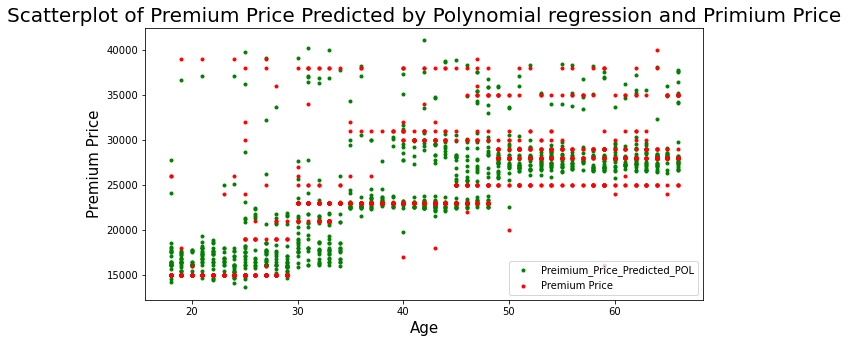

In [1636]:
Preimium_Price_Predicted_POL=Pol_reg.predict(X_Prime_pol)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot()
ax1.scatter(x=MIP.Age,y=Preimium_Price_Predicted_POL,marker=".",color="green")
ax1.scatter(x=MIP.Age,y=Y_Prime,marker=".",color="red")
plt.xlabel("Age",size=15)
plt.ylabel("Premium Price",size=15)
plt.title("Scatterplot of Premium Price Predicted by Polynomial regression and Primium Price",size=20)
plt.legend(["Preimium_Price_Predicted_POL","Premium Price"],loc="lower right")

In [1637]:
np.corrcoef(Preimium_Price_Predicted_POL,Y_Prime)

array([[1.        , 0.94793729],
       [0.94793729, 1.        ]])

* By Polynomial regression model the train and test accuracy acheived are  respectively 0.9035412963885743 and 0.871783706198217, and correlation between Premium Price and Premium Price Predicted by Polynomial regression model is 0.94793729.

                                                8.3 RIDGE REGRESSION

In [1638]:
Ridge = Ridge(alpha=0.5)
x_train, x_test, y_train, y_test = train_test_split(X_Prime,Y_Prime , test_size=0.15, random_state=0)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
train_accuracy=Ridge.score(x_train,y_train)
test_accuracy=Ridge.score(x_test,y_test)
print(Ridge.score(x_train, y_train))
print(Ridge.score(x_test, y_test))

26973.761937493393
[ -225.86968728   362.9367268   1099.33008176  1363.23495246
    40.98586592    12.18991508   154.70686568 -6747.63431618
  -866.98841876  7614.62273494 -2861.85048641  1917.16377263
   944.68671378  -182.23871669   369.81599342  -187.57727673
   111.22444284  -136.73346468    25.50902184]
0.8526411383217771
0.8664462506631887


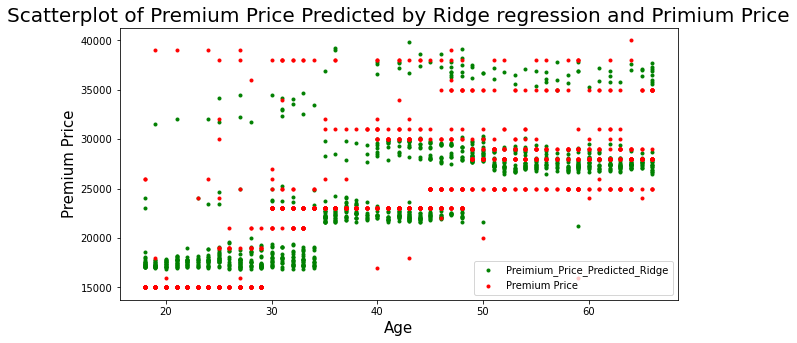

In [1639]:
Preimium_Price_Predicted_Ridge=Ridge.predict(X_Prime)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot()
ax1.scatter(x=MIP.Age,y=Preimium_Price_Predicted_Ridge,marker=".",color="green")
ax1.scatter(x=MIP.Age,y=Y_Prime,marker=".",color="red")
plt.xlabel("Age",size=15)
plt.ylabel("Premium Price",size=15)
plt.title("Scatterplot of Premium Price Predicted by Ridge regression and Primium Price",size=20)
plt.legend(["Preimium_Price_Predicted_Ridge","Premium Price"],loc="lower right")

In [1640]:
np.corrcoef(Preimium_Price_Predicted_Ridge,Y_Prime)

array([[1.       , 0.9246294],
       [0.9246294, 1.       ]])

* By Ridge regression model the train and test accuracy acheived are respectively 0.8526411383217771 and 0.8664462506631887, and correlation between Premium Price and Premium Price Predicted by Ridge regression model is 0.9246294.

                                             8.4 LOGISTIC REGRESSION

In [1641]:
Lr=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X_Prime,Y_Prime , test_size=0.15, random_state=0)
Lr.fit(x_train, y_train)
print(Lr.intercept_)
print(Lr.coef_)
train_accuracy=Lr.score(x_train,y_train)
test_accuracy=Lr.score(x_test,y_test)
print(Lr.score(x_train, y_train))
print(Lr.score(x_test, y_test))


[ 1.58894185 -0.23420039 -0.99034229 -0.51099603 -0.61841032 -1.10664705
 -0.22685782 -0.72798072  2.16561042  0.63873795  1.42461613  0.38649062
 -0.98893578 -4.53883109  1.98599241  0.36176726 -0.90016807  0.48957848
 -0.56247362  1.6666721  -0.02254761  0.7252901  -0.00530652]
[[ 2.80907650e-01 -7.88919024e-01  4.38843037e-01 -2.88252050e+00
  -5.58339621e-02  4.13137512e-01 -5.31448262e-01  2.44495877e+00
  -1.31302112e+00 -1.13348139e+00  2.15385144e+00 -1.76729903e+00
  -3.88096147e-01 -9.77947938e-02  3.19529713e-01 -2.23278657e-01
   9.42469965e-02  2.25949349e-02 -1.18385669e-01]
 [-2.32749251e-03 -2.17931170e-01 -1.16223930e-01 -4.01054618e-01
   7.98129219e-01  5.44872231e-01 -4.58235676e-01  7.69544612e-01
  -5.51005947e-01 -2.17513011e-01  1.17211715e-01 -5.68015840e-01
   4.51829779e-01  5.62705505e-01 -4.68897914e-01 -9.27819363e-02
  -3.97700128e-01  2.90694542e-01  1.08031240e-01]
 [-3.22309145e-01  4.38906751e-01  8.73748598e-01 -1.53709323e-01
  -2.02051232e-01 -8.74

C:\Users\Ankur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


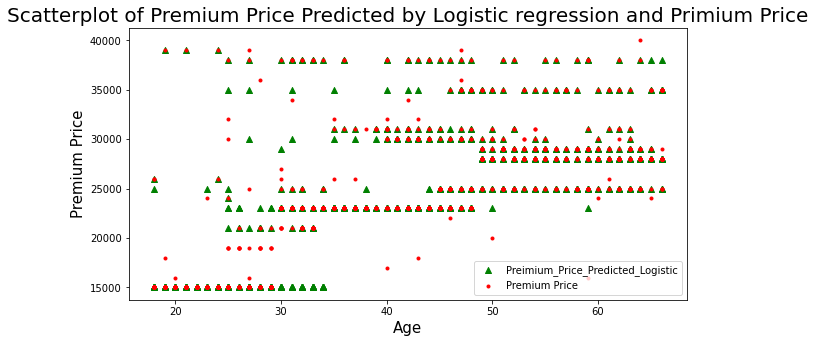

In [1642]:
Preimium_Price_Predicted_Logistic=Lr.predict(X_Prime)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot()
ax1.scatter(x=MIP.Age,y=Preimium_Price_Predicted_Logistic,marker="^",color="green")
ax1.scatter(x=MIP.Age,y=Y_Prime,marker=".",color="red")
plt.xlabel("Age",size=15)
plt.ylabel("Premium Price",size=15)
plt.title("Scatterplot of Premium Price Predicted by Logistic regression and Primium Price",size=20)
plt.legend(["Preimium_Price_Predicted_Logistic","Premium Price"],loc="lower right")

In [1643]:
np.corrcoef(Preimium_Price_Predicted_Logistic,Y_Prime)

array([[1.       , 0.9278069],
       [0.9278069, 1.       ]])

* By Logistic regression model the train and test accuracy acheived are respectively 0.8174224343675418 and 0.8040540540540541, and correlation between Premium Price and Premium Price Predicted by Logistic regression model is 0.9278069.

                                              8.5 K-NEAREST NEIGHBOR

In [1644]:
# As we don't know what value of K will give the best accuracy, so performing for several values of K
for k in range (1,15):
    knc=KNeighborsRegressor(n_neighbors=k,metric="euclidean")
    x_train, x_test, y_train, y_test=train_test_split(X_Prime, Y_Prime, test_size=0.15, random_state=0 )
    knc.fit(x_train, y_train)
    print(knc.score(x_test, y_test))

0.7126551551218387
0.8156888066424366
0.8348724958100167
0.8152680516910078
0.8091307762970458
0.8073147568774158
0.8049338995912825
0.8037947825276583
0.8017655045821498
0.7968291329951762
0.7831961094136992
0.7723008753231551
0.7723519575017165
0.7711637595274821


In [1645]:
knc=KNeighborsRegressor(n_neighbors=3,metric="euclidean")
x_train, x_test, y_train, y_test=train_test_split(X_Prime, Y_Prime, test_size=0.15, random_state=0 )
knc.fit(x_train, y_train)
train_accuracy=knc.score(x_train,y_train)
test_accuracy=knc.score(x_test,y_test)
print(knc.score(x_train, y_train))
print(knc.score(x_test, y_test))

0.8732753124024181
0.8348724958100167


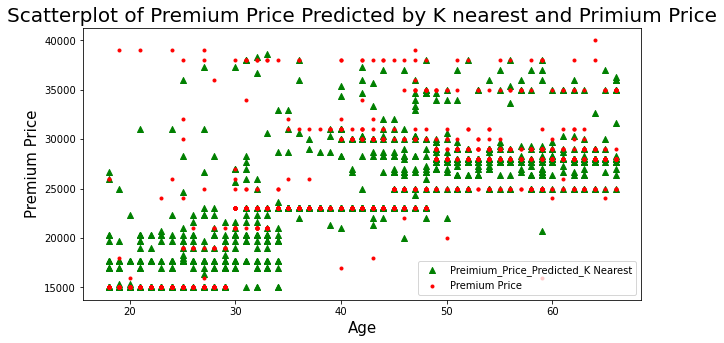

In [1646]:
Preimium_Price_Predicted_KNC=knc.predict(X_Prime)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot()
ax1.scatter(x=MIP.Age,y=Preimium_Price_Predicted_KNC,marker="^",color="green")
ax1.scatter(x=MIP.Age,y=Y_Prime,marker=".",color="red")
plt.xlabel("Age",size=15)
plt.ylabel("Premium Price",size=15)
plt.title("Scatterplot of Premium Price Predicted by K nearest and Primium Price",size=20)
plt.legend(["Preimium_Price_Predicted_K Nearest","Premium Price"],loc="lower right")

In [1647]:
np.corrcoef(Preimium_Price_Predicted_KNC,Y_Prime)

array([[1.        , 0.93199472],
       [0.93199472, 1.        ]])

* By  model K-NEAREST NEIGHBOR the train and test accuracy acheived are respectively 0.8732753124024181 and 0.8348724958100167, and correlation between Premium Price and Premium Price Predicted by K-NEAREST NEIGHBOR model is 0.93199472.

                                            8.6 DECISION TREE REGRESSOR

In [1648]:
dt=DecisionTreeRegressor()
x_train, x_test, y_train, y_test=train_test_split(X_Prime, Y_Prime, test_size=0.15, random_state=0 )
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))


0.9472921414934277
0.8670626775143699


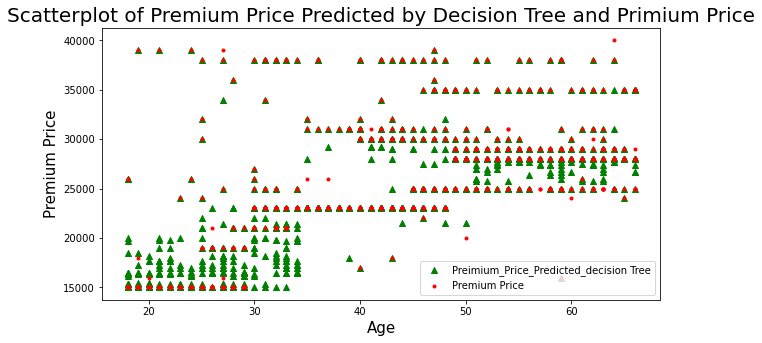

In [1649]:
Preimium_Price_Predicted_DT=dt.predict(X_Prime)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot()
ax1.scatter(x=MIP.Age,y=Preimium_Price_Predicted_DT,marker="^",color="green")
ax1.scatter(x=MIP.Age,y=Y_Prime,marker=".",color="red")
plt.xlabel("Age",size=15)
plt.ylabel("Premium Price",size=15)
plt.title("Scatterplot of Premium Price Predicted by Decision Tree and Primium Price",size=20)
plt.legend(["Preimium_Price_Predicted_decision Tree","Premium Price"],loc="lower right")

In [1650]:
np.corrcoef(Preimium_Price_Predicted_DT,Y_Prime)

array([[1.       , 0.9667876],
       [0.9667876, 1.       ]])

* By model Decision tree the train and test accuracy acheived are respectively 0.9472921414934277 and 0.8696898303818275, and correlation between Premium Price and Premium Price Predicted by Decision tree model is 0.96700055.

                                Visualizing Important Features for Decision Tree Regressor

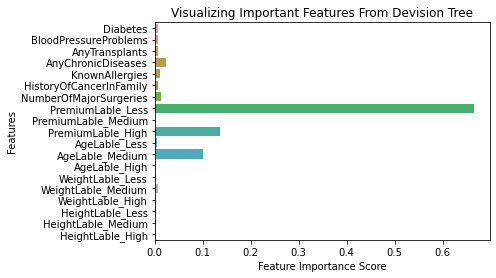

In [1651]:
dt_fea_imp=DecisionTreeRegressor()
dt_fea_imp.fit(x_train,y_train)
feature_imp1 = dt_fea_imp.feature_importances_
sns.barplot(x=feature_imp1, y=X_Prime.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Devision Tree")
plt.show();

                                         8.7 RANDOM FOREST REGRESSOR

In [1652]:
x_train, x_test, y_train, y_test = train_test_split(X_Prime,Y_Prime , test_size=0.15, random_state=0)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
test_accuracy=rf.score(x_test,y_test)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))


0.9411229050145553
0.8954479955546624


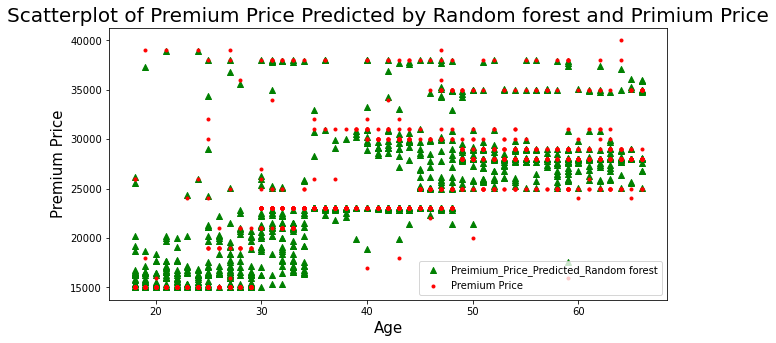

In [1653]:
Preimium_Price_Predicted_RF=rf.predict(X_Prime)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot()
ax1.scatter(x=MIP.Age,y=Preimium_Price_Predicted_RF,marker="^",color="green")
ax1.scatter(x=MIP.Age,y=Y_Prime,marker=".",color="red")
plt.xlabel("Age",size=15)
plt.ylabel("Premium Price",size=15)
plt.title("Scatterplot of Premium Price Predicted by Random forest and Primium Price",size=20)
plt.legend(["Preimium_Price_Predicted_Random forest","Premium Price"],loc="lower right")

In [1654]:
np.corrcoef(Preimium_Price_Predicted_RF, Y_Prime)

array([[1.        , 0.96649043],
       [0.96649043, 1.        ]])

* By model Random forest the train and test accuracy acheived are respectively 0.9410219021646516 and 0.8963734967009739, and correlation between Premium Price and Premium Price Predicted by Random forest model is 0.96652292.

                                 Visualizing Important Features for Random Forest Model

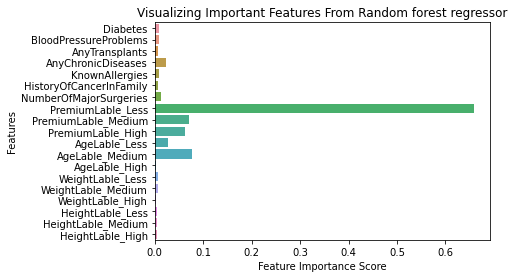

In [1655]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X_Prime.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random forest regressor")
plt.show();

# 9. Visualizing Accuracy of Train-Test of Models

In [1656]:
Accuracy=pd.DataFrame([["Linear_Regression",0.852649782,0.86643969],["Polynomial_Regression",0.903541296,0.871783706],
                      ["Ridge_Regression",0.852641138,0.866446251],["Logistic_Regression",0.817422434,0.804054054],
                       ["K-Nearest_Neighbor",0.8732753124024181,0.8348724958100167],
                      ["Decision_Tree",0.9472921414934277,0.8696898303818275],
                       ["Random_Forest_Regressor",0.9410219021646516,0.8963734967009739]],
                      columns=["Model","Train Accuracy","Test Accuracy"])
Accuracy


,Model,Train Accuracy,Test Accuracy
0,Linear_Regression,0.852650,0.866440
1,Polynomial_Regression,0.903541,0.871784
2,Ridge_Regression,0.852641,0.866446
3,Logistic_Regression,0.817422,0.804054
4,K-Nearest_Neighbor,0.873275,0.834872
5,Decision_Tree,0.947292,0.869690
6,Random_Forest_Regressor,0.941022,0.896373


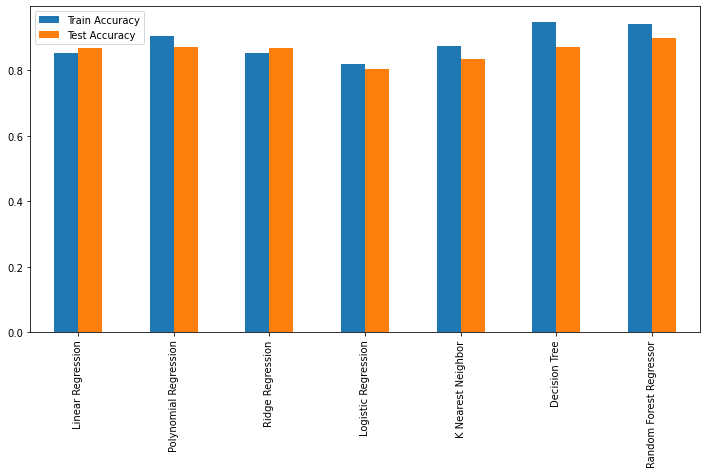

In [1657]:
Train_Accuracy=[0.852649782,0.903541296,0.852641138,0.817422434,0.8732753124024181,0.9472921414934277,0.9410219021646516]
Test_Accuracy=[0.86643969,0.871783706,0.866446251,0.804054054,0.8348724958100167,0.8696898303818275,0.8963734967009739]
index=["Linear Regression","Polynomial Regression","Ridge Regression",
       "Logistic Regression","K Nearest Neighbor","Decision Tree","Random Forest Regressor"]
df=pd.DataFrame({'Train Accuracy':Train_Accuracy,'Test Accuracy':Test_Accuracy},index=index)
ax=df.plot.bar(figsize=(12,6))

* Random Forest Regressor performs best in terms Test Accuracy and second best in case of Train Accuracy, so using this as our Prediction model and performing Hyperparameter Tuning to see weather any gain in accuracy occure or not

# 10. Hyperparameter Tuning in Random Forest

                                    10.1 RandomizedSearchCV for Tuning Parameters

In [1658]:
n_estimators = [100, 200, 300, 400, 500,600,700]
max_features = ['auto']
max_depth = [5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)

In [1138]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

* Best Parameters obtained by RandomSearchCV Tuning method is

In [1139]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5}

* Creating RandomForestRegressor model with the parameters obtained by RandomSearchCV Tuning method

In [1460]:
RFR_Tune_RSCV = RandomForestRegressor(n_estimators=600,
                            min_samples_split= 15,
                            min_samples_leaf=1,
                            max_features='auto',
                            max_depth=20)
x_train, x_test, y_train, y_test = train_test_split(X_Prime,Y_Prime , test_size=0.15, random_state=42)
RFR_Tune_RSCV.fit(x_train,y_train)
train_accuracy=classifier.score(x_train,y_train)
test_accuracy=classifier.score(x_test,y_test)
print(train_accuracy,test_accuracy)

0.9141225348470772 0.9031401470421846


* As we can see test accuracy has been slightly improved by using RandomSearchCV Tuning method

                                     10.2 GridSearchCV for Tuning Parameters

In [1125]:
reg=RandomForestRegressor(n_jobs=-1,verbose=2)
param_grid={'n_estimators':[20,25,30,35,40,45,50,55,60,65,70,75,100,150,200,300,500],
            'criterion':['mse','mae'],
            'max_depth':[1,2,3,4,5,6,7,8,9,10],
            'min_samples_split':[1,2,3,4,5],
            'max_features':['auto']}
gs=GridSearchCV(reg,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [1126]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 1700 candidates, totalling 5100 fits


C:\Users\Ankur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1020 fits failed out of a total of 5100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1020 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ankur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ankur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Ankur\anaconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\Ankur\anaconda3\lib\site-packages\joblib\parallel.py

building tree 1 of 45
building tree 2 of 45building tree 3 of 45
building tree 4 of 45building tree 5 of 45

building tree 6 of 45
building tree 7 of 45

building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45building tree 12 of 45building tree 13 of 45
building tree 14 of 45


building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45building tree 19 of 45building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45


building tree 24 of 45
building tree 25 of 45
building tree 26 of 45building tree 27 of 45

building tree 28 of 45building tree 29 of 45building tree 30 of 45


building tree 31 of 45
building tree 32 of 45
building tree 33 of 45building tree 34 of 45
building tree 35 of 45

building tree 36 of 45building tree 37 of 45

building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45building tree 42 of 45

building tree 43 of 45
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto'],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 25, 30, 35, 40, 45, 50, 55, 60,
                                          65, 70, 75, 100, 150, 200, 300,
                                          500]},
             verbose=1)

* Best Parameters obtained by GridSearchCV Tuning method is

In [1127]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 45}

In [1021]:
gs.best_score_

0.881789363970903

* Creating RandomForestRegressor model with the parameters obtained by GridSearchCV Tuning method

In [1461]:
RFR_Tune_GSCV = RandomForestRegressor(criterion='mse',
                            n_estimators=45,
                            min_samples_split=2,
                            max_features='auto',
                            max_depth=6)
x_train, x_test, y_train, y_test = train_test_split(X_Prime,Y_Prime , test_size=0.15, random_state=0)
RFR_Tune_GSCV .fit(x_train,y_train)
train_accuracy=bag_model.score(x_train,y_train)
test_accuracy=bag_model.score(x_test,y_test)
print(train_accuracy,test_accuracy)

C:\Users\Ankur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.8878281622911695 0.7905405405405406


* As we can see both train and test accuracy has been significantly droped by using GridSearchCV Tuning method

                                           10.3 Ensemble_Bagging Method 

In [1466]:
x_train, x_test, y_train, y_test=train_test_split(X_Prime, Y_Prime, test_size=0.15, random_state=0 )
bag_model=BaggingRegressor(base_estimator=RandomForestRegressor(),
                  n_estimators=50,
                  max_samples=0.85,
                  oob_score=True,
                  random_state=0)
bag_model.fit(x_train,y_train)
train_accuracy=bag_model.score(x_train,y_train)
test_accuracy=bag_model.score(x_test,y_test)
print(train_accuracy,test_accuracy)

0.9295414090272351 0.8992317718283851


* Here we can see that train accuracy has slightly droped and test accuracy has slightly improved by using Ensemble_Bagging method

                                         10.4 Ensemble_Boosting Method

In [1469]:
x_train, x_test, y_train, y_test=train_test_split(X_Prime, Y_Prime, test_size=0.15, random_state=0 )
ADB_model=AdaBoostRegressor(base_estimator=RandomForestRegressor(),
                  n_estimators=50,
                  random_state=0)
ADB_model.fit(x_train,y_train)
Train_accuracy=ADB_model.score(x_train,y_train)
Test_accuracy=ADB_model.score(x_test,y_test)
print(train_accuracy,test_accuracy)

0.9295414090272351 0.8992317718283851


* Here we can see that again both Ensemble_Bagging method and Ensemble_Boosting method delivers same accuracy.

# 11. Visualizing Accuracy after Tuning Parameters

In [1472]:
Tune_Accuracy=pd.DataFrame([["RandomizedSearchCV",0.9141225348470772,0.9031401470421846],
                            ["GridSearchCV",0.8878281622911695,0.7905405405405406],
                            ["Ensemble_Bagging",0.9295414090272351,0.8992317718283851],
                            ["Ensemble_Boosting",0.9295414090272351,0.8992317718283851]],
                          columns=["Method","Train_Accuracy","Test_Accuracy"])
Tune_Accuracy

,Method,Train_Accuracy,Test_Accuracy
0,RandomizedSearchCV,0.914123,0.903140
1,GridSearchCV,0.887828,0.790541
2,Ensemble_Bagging,0.929541,0.899232
3,Ensemble_Boosting,0.929541,0.899232


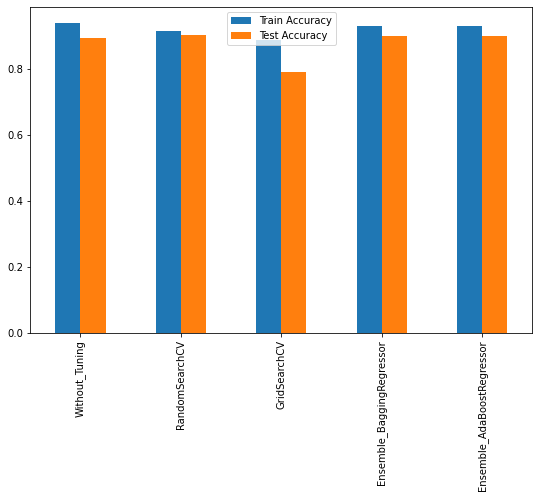

In [1473]:
Train_Accuracy=[0.9408823310027179,0.9141225348470772,0.8878281622911695,0.9295414090272351,0.9295414090272351]
Test_Accuracy=[0.8954442429843621,0.9031401470421846,0.7905405405405406,0.8992317718283851,0.8992317718283851]
index=["Without_Tuning","RandomSearchCV","GridSearchCV","Ensemble_BaggingRegressor","Ensemble_AdaBoostRegressor"]
df=pd.DataFrame({'Train Accuracy':Train_Accuracy,'Test Accuracy':Test_Accuracy},index=index)
ax=df.plot.bar(figsize=(9,6))


* As we know the model with higher Test accuracy performs better in predicting the target feature.
  Here we see after the Hyperparameter tuning by RandomSearchCv method the model obtained is having the highest Test accuracy.

# PREDICTION

                                        Checking our Test Dataset

In [1475]:
np.array(x_test)

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [1476]:
len(x_test)

148

In [1477]:
np.array(y_test)

array([23000, 23000, 28000, 23000, 38000, 23000, 15000, 29000, 25000,
       35000, 23000, 23000, 15000, 25000, 30000, 15000, 23000, 29000,
       15000, 40000, 15000, 28000, 23000, 15000, 19000, 38000, 23000,
       25000, 29000, 35000, 35000, 15000, 15000, 15000, 25000, 23000,
       23000, 25000, 25000, 19000, 28000, 19000, 23000, 19000, 23000,
       15000, 28000, 39000, 29000, 28000, 15000, 21000, 15000, 28000,
       30000, 28000, 25000, 28000, 35000, 23000, 29000, 28000, 30000,
       30000, 25000, 31000, 15000, 23000, 29000, 23000, 23000, 23000,
       30000, 15000, 28000, 28000, 23000, 25000, 29000, 23000, 30000,
       28000, 15000, 29000, 23000, 28000, 15000, 23000, 30000, 23000,
       38000, 38000, 31000, 23000, 21000, 19000, 25000, 25000, 38000,
       28000, 25000, 23000, 21000, 15000, 28000, 25000, 25000, 23000,
       23000, 23000, 15000, 28000, 28000, 35000, 38000, 35000, 26000,
       23000, 25000, 15000, 23000, 28000, 23000, 38000, 23000, 29000,
       21000, 15000,

In [1576]:
# Predicterd Premium Price on the basis of Random forest regressor with tunned parameters by RandomSearchCV method
y_Predicted=RFR_Tune_RSCV.predict(x_test)
y_Predicted

array([23000.        , 22940.40617096, 28004.07407407, 23000.        ,
       37916.88744407, 23000.        , 17895.40655393, 28786.27938275,
       27286.43958134, 36670.82895641, 17069.59482866, 18382.43260475,
       16284.99848337, 27328.43383968, 28363.99395721, 15949.25616315,
       23000.        , 28973.17932915, 15933.37513613, 38078.02159468,
       16919.90743378, 28246.25834716, 22999.56521739, 17350.6585763 ,
       21055.24358785, 37955.23290567, 23000.        , 26610.75474789,
       29021.66630164, 34901.56551394, 34945.56974316, 16390.54681375,
       18779.98737084, 18501.32512988, 27373.03731269, 22720.85730613,
       23000.        , 26767.58411213, 26334.62583774, 20868.85205874,
       27966.94421425, 20394.78924903, 23000.        , 20465.43596873,
       23000.        , 16825.39224299, 27981.5619573 , 36952.52565215,
       27116.18819197, 28023.21491685, 17420.42055752, 17895.40655393,
       16031.27062655, 27999.13128826, 27738.74129761, 28016.5733944 ,
      

In [1479]:
len(y_Predicted)

148

In [1480]:
RFR_Tune_RSCV.score(x_test,y_test)

0.9278986805815698

                                     Visualizing the Predicted and Tested values

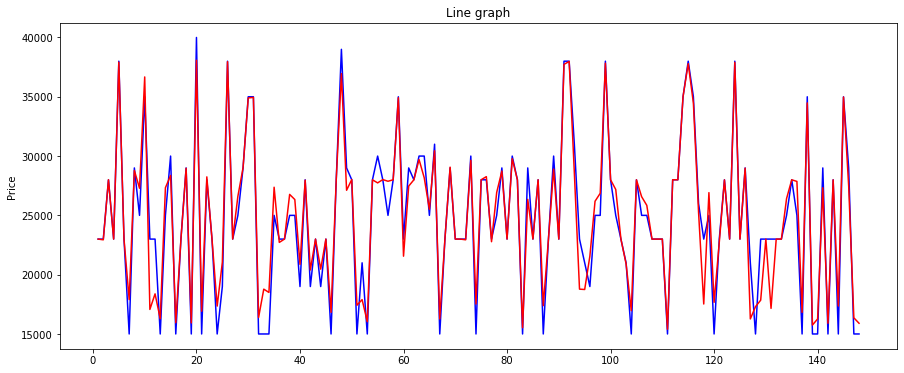

In [1486]:
x= np.arange(1, 149)
y1 = y_test
y2 = y_Predicted
plt.figure(figsize=(15,6))
plt.title("Line graph")
plt.ylabel("Price")
plt.plot(x, y1, color ="blue")
plt.plot(x, y2, color ="red")
plt.show()

In [1578]:
np.corrcoef(y_Predicted,y_test)

array([[1.        , 0.96381087],
       [0.96381087, 1.        ]])

                                 Predicting with Target variable with valid Feature variables

In [1495]:
X_Prime.columns

Index(['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'PremiumLable_Less', 'PremiumLable_Medium',
       'PremiumLable_High', 'AgeLable_Less', 'AgeLable_Medium',
       'AgeLable_High', 'WeightLable_Less', 'WeightLable_Medium',
       'WeightLable_High', 'HeightLable_Less', 'HeightLable_Medium',
       'HeightLable_High'],
      dtype='object')

In [1494]:
RFR_Tune_RSCV.predict([[0,0,0,1,0,0,2,1,0,0,0,1,0,0,1,0,0,1,0],
                       [1,1,0,1,0,0,2,0,1,0,0,0,1,0,1,0,0,0,1],
                       [1,0,0,1,0,0,3,0,1,0,0,0,1,0,1,0,0,0,1]])


C:\Users\Ankur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([23000.        , 28005.88760796, 28009.2209413 ])